In [145]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_blancoNegro = cv.imread('./imgs2/blancoNegro.png')
img_circuit = cv.imread('./imgs2/circuit.jpg')


In [146]:
def apply_roberts(img):
    mask_x = np.array([[-1, 0 , 0], [0, 1, 0], [0, 0, 0]])
    mask_y = np.array([[0, -1 , 0], [1, 0, 0], [0, 0, 0]])
    h, w, c = img.shape
    result = np.zeros([h, w, c], dtype=int)
    for i in range(h - 2):
        for j in range(w -2):
            x = img[i: i + 3, j: j + 3, 0]
            y = img[i: i + 3, j: j + 3, 0]
            gx = sum(sum(mask_x * x))
            gy = sum(sum(mask_y * y))
            result[i, j, 0:3] = (int)(np.sqrt(gx**2 + gy**2))
    return result 


In [147]:
def apply_sobel(img):
    mask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    mask_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    h, w, c = img.shape
    result = np.zeros([h, w, c], dtype=int)
    for i in range(h - 2):
        for j in range(w -2):
            x = img[i: i + 3, j: j + 3, 0]
            y = img[i: i + 3, j: j + 3, 0]
            gx = sum(sum(mask_x * x))
            gy = sum(sum(mask_y * y))
            result[i + 1, j + 1, 0:3] = (int)(np.sqrt(gx**2 + gy**2))
    return result 

In [148]:
def apply_prewitt(img):
    mask_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    mask_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    h, w, c = img.shape
    result = np.zeros([h, w, c], dtype= int)
    for i in range(h - 2):
        for j in range(w -2):
            x = img[i: i + 3, j: j + 3, 0]
            y = img[i: i + 3, j: j + 3, 0]
            gx = sum(sum(mask_x * x))
            gy = sum(sum(mask_y * y))
            result[i + 1, j + 1, 0:3] = (int)(np.sqrt(gx**2 + gy**2))
    return result 

In [149]:
def tests(img_name, img):
    plt.rcParams['figure.figsize'] = [10,10]
    fig, axes = plt.subplots(nrows=1, ncols=3)
    messages = [img_name+'-roberts', img_name+'-sobel', img_name+'-prewitt']
    result_roberts = apply_roberts(img)
    result_sobel = apply_sobel(img)
    result_prewitt = apply_prewitt(img)
    images = [result_roberts, result_sobel, result_prewitt]
    for ax, message, image in zip(axes.flat, messages, images):
        ax.imshow(image)
        ax.set(title= message)
        ax.axis('off')
        cv.imwrite(message+'.jpg', image)
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


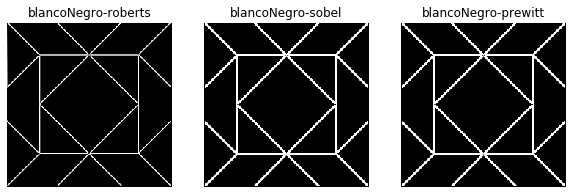

In [150]:
tests('blancoNegro', img_blancoNegro)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


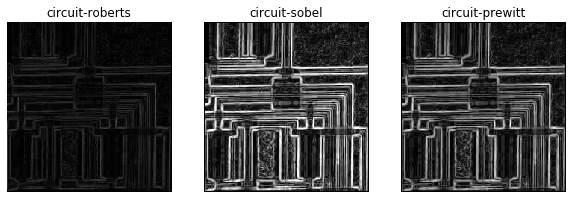

In [151]:
tests('circuit', img_circuit)